<a href="https://colab.research.google.com/github/RitvikVankayala/NLP/blob/main/Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv

--2022-12-31 06:28:24--  https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5698602 (5.4M) [text/csv]
Saving to: ‘tmdb_5000_movies.csv.2’

tmdb_5000_movies.cs 100%[===================>]   5.43M  --.-KB/s    in 0.09s   

2022-12-31 06:28:24 (63.3 MB/s) - ‘tmdb_5000_movies.csv.2’ saved [5698602/5698602]



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances

In [ ]:
df=pd.read_csv('tmdb_5000_movies.csv')

In [ ]:
df.head()
df.shape

(4803, 20)

We use iloc which is available in pandas for getting info from any particular row or column iloc[row,column]

In [ ]:
x=df.iloc[0]
x

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [ ]:
x['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [ ]:
x['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

We use json.loads from converting json objects into python readable data like a dictionary

In [ ]:
j=json.loads(x['genres'])
j

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [ ]:
' '.join(''.join(jj['name'].split()) for jj in j)

'Action Adventure Fantasy ScienceFiction'

Now we will do the similiar thing for each item of the data and join into a single string

In [ ]:
def genres_and_keywords_to_string(row):
  genres=json.loads(row['genres'])
  genres=' '.join(''.join(j['name'].split()) for j in genres)

  keywords=json.loads(row['keywords'])
  keywords=' '.join(''.join(j['name'].split()) for j in keywords)

  return "%s %s" % (genres,keywords)

Creating a new column in the df for each movie

In [ ]:
df['string']=df.apply(genres_and_keywords_to_string,axis=1)

In [ ]:
#creating an instance for using the tfidf
# 2000 mostly reapeting features are only taken
tfidf=TfidfVectorizer(max_features=2000)

Creates a data matrix from the Total dataset

In [ ]:
X=tfidf.fit_transform(df['string'])

In [ ]:
X

<4803x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 37285 stored elements in Compressed Sparse Row format>

In [ ]:
# we will generate a mapping from movie title to index
# index=#### is inbuild to know the index type
movie2idx=pd.Series(df.index,index=df['title'])
movie2idx

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [ ]:
idx=movie2idx['Spectre']
idx

2

In [ ]:
query=X[idx]
query

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [ ]:
#print the query vector
query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#computing the cosine similarity

scores=cosine_similarity(query,X)
scores

array([[0.03694098, 0.03875415, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# converting 1*N matrix to a 1d array

scores=scores.flatten()
scores

array([0.03694098, 0.03875415, 1.        , ..., 0.        , 0.        ,
       0.        ])

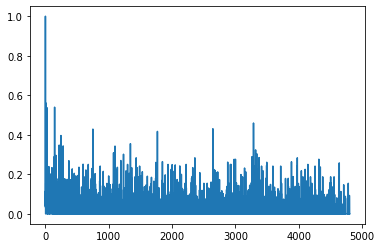

In [ ]:
plt.plot(scores)

In [ ]:
# we will sort the scores in descending order so that we can get the top Five similiar movies as query
# array.argsort() gives the indexes of the elements in ascending order
ordered_scores=(-scores).argsort()

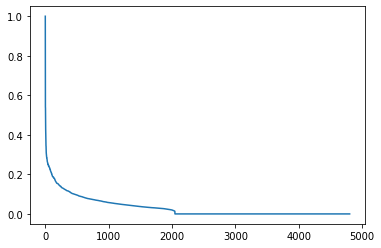

In [ ]:
plt.plot(scores[ordered_scores])

In [64]:
 #retreiving the top fives matches

recommended_idx=ordered_scores[1:6]

In [66]:
# converting indexes to movies titles
df['title'].iloc[recommended_idx]

11      Quantum of Solace
147       Die Another Day
29                Skyfall
3285             Restless
2644            Ong Bak 2
Name: title, dtype: object

In [72]:
# creating a generalized function for the recommendation system

def recommend(title):
  idx=movie2idx[title]

  # if multiple titles have same movie name it just generate a pd series so we need to just grab the first idx
  if type(idx)==pd.Series:
    idx=idx.iloc[0]
  
  # Now calculating the cosine_similarity
  query=X[idx]
  scores=cosine_similarity(query,X)

  # converty pandas data frame to a 1d array
  scores=scores.flatten()

  # Sorting in descending order for the recommendations
  ordered_idx=(-scores).argsort()
  recommended_idx=ordered_idx[1:6]

  # returning the titles
  return df['title'].iloc[recommended_idx]


In [74]:
print("Recommendation for 'Avatar' : ")
print(recommend('Avatar'))

Recommendation for 'Avatar' : 
47      Star Trek Into Darkness
3214                 Barbarella
1287         A Monster in Paris
61            Jupiter Ascending
3730                      Cargo
Name: title, dtype: object
